In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#Data into datframe
df = pd.read_csv("./homeprices_banglore.csv")

In [5]:
df.sample(5)

,area,bedrooms,price
18,2770,3,102.0
4,1200,2,51.0
7,3300,4,155.0
10,1800,3,82.0
9,3700,5,167.0


In [6]:
#Using min-max Scaling
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [7]:
independent_df = df.drop('price', axis = 'columns')

In [8]:
scaled_X = sx.fit_transform(independent_df)
scaled_X


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
dependent_df = df[['price']].values.reshape(df.shape[0], 1)

In [10]:
dependent_df

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [11]:
scaled_Y = sy.fit_transform(dependent_df)
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

BATCH GRADIENT DESCENT

In [12]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list =[]
  for i in range(epochs):
    y_pred = np.dot(w, scaled_X.T)+ b ##w1 * area + w2 * bedrooms

    w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_pred))
    b_grad = -(2 / total_samples) * np.sum(y_true - y_pred)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_pred))

    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

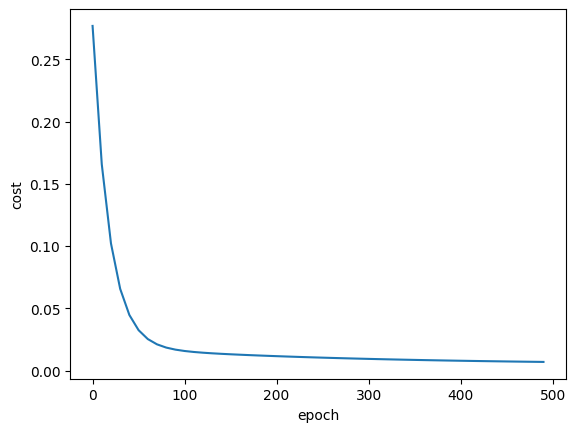

In [13]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

STOICHASTIC GRADIENT DESCENT

In [14]:
def stoichastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    random_index = random.randint(0, total_samples - 1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_pred = np.dot(w, sample_x.T) + b
    w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_pred))
    b_grad = -(2 / total_samples) * (sample_y - y_pred)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_pred)
    if i % 100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost,cost_list, epoch_list
w_sgd, b_sgd,cost_sgd,cost_list_sgd, epoch_list_sgd = stoichastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 10000)
w_sgd,b_sgd,cost_sgd


(array([0.70983344, 0.67557544]), -0.23086086184836468, 0.0065214615781462185)

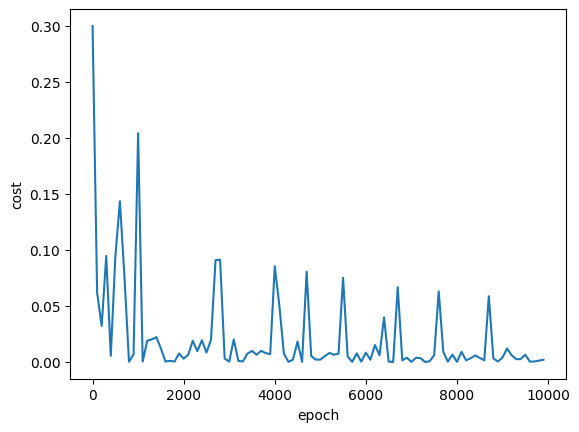

In [15]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

MINI BATCH GRADIENT DESCENT

In [16]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]
  if batch_size > total_samples:
    batch_size = total_samples
  cost_list = []
  epoch_list = []

  num_batches = int(total_samples / batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_tmp = X[random_indices]
    y_tmp = y_true[random_indices]

    for j in range(0, total_samples, batch_size):
      Xj = X_tmp[j : j + batch_size]
      yj = y_tmp[j : j + batch_size]

      y_pred = np.dot(w, Xj.T) + b

      w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_pred))
      b_grad = -(2 / len(Xj)) * np.sum(yj - y_pred)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.mean(np.square(yj - y_pred))
    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_Y.reshape(scaled_Y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost


(array([0.70997314, 0.67800373]), -0.23359918477033226, 0.003372373031870135)

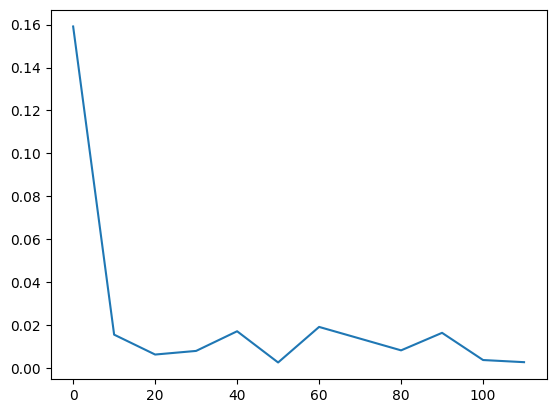

In [17]:
plt.plot(epoch_list, cost_list)